**Spotify Data, Lipaz Hagai python project**  
------

This project aims to analyze my personal listening habits on Spotify in order to:
---
- Identify which music genres and artists I listen to the most.
- Understand how my music preferences change based on time of day.
- Explore listening patterns and correlations (e.g. song skipping and listening duration).
- Improve my playlist organization by recommending new artists or reshuffling existing ones.

**Research Question:  
How do my listening habits change across different times of the day, and how can I optimize my playlists accordingly?**


Methods:  
-------
- Using **Pandas & NumPy** for data manipulation.
- Using **Matplotlib & Seaborn** for visualizing trends.
- Performing **statistical and categorical analysis** on my listening habits.

In [1]:
import pandas as pd
import seaborn as sb
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

**Color Theme:**  
Spotify: #121212, #212121, #535353, #b3b3b3, #1db954. Green, Grey And black  
Day Parts: #fce803, #fc6b03, #4b8aa6, #043145. Yellow-Morning, Orange-Afternoon, LightBlue-Evening, DarkBlue-Night

In [2]:
SpotifyColors = ["#121212", "#212121", "#535353", "#b3b3b3", "#1db954"]  ### Spotify color spectrum
DayPartColors = ["#fce803", "#fc6b03", "#4b8aa6", "#043145"] ## yellow for morning, orange afternoon, light blue for evening, dark blue for night
ordered_dayparts = ["Morning", "Afternoon", "Evening", "Night"] #order of presentation to make it in the order of the day

**Creating all DayParts**

In [3]:
def get_day_part(hour):
    if 6 <= hour < 12:
        return "Morning"
    elif 12 <= hour < 18:
        return "Afternoon"
    elif 18 <= hour < 24:
        return "Evening"
    else:
        return "Night"

**Importing DataFrame**

In [4]:
Lp=pd.read_excel("Main.xlsx")[["TimeOfStream","ms_played","ArtistName","AlbumName","TrackName","EndCode","Shuffle","Genre","OriginState","OriginCountry","OriginCity"]]

In [5]:
Lp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24338 entries, 0 to 24337
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TimeOfStream   24338 non-null  object
 1   ms_played      24338 non-null  int64 
 2   ArtistName     24338 non-null  object
 3   AlbumName      24338 non-null  object
 4   TrackName      24338 non-null  object
 5   EndCode        24338 non-null  object
 6   Shuffle        24338 non-null  object
 7   Genre          24338 non-null  object
 8   OriginState    24338 non-null  object
 9   OriginCountry  24338 non-null  object
 10  OriginCity     24338 non-null  object
dtypes: int64(1), object(10)
memory usage: 2.0+ MB


In [6]:
Lp.head()

,TimeOfStream,ms_played,ArtistName,AlbumName,TrackName,EndCode,Shuffle,Genre,OriginState,OriginCountry,OriginCity
0,2023-05-27T13:12:34Z,196184,Crown The Empire,Sudden Sky,what i am,trckdn,OFF,Metalcore,Texas,United States,Dallas
1,2023-05-27T13:17:26Z,291426,Bullet For My Valentine,Fever,Your Betrayal,trckdn,OFF,Metalcore,Wales,United Kingdom,Bridgend
2,2023-05-27T13:21:58Z,271000,Five Finger Death Punch,The Wrong Side Of Heaven And The Righteous Sid...,Wrong Side of Heaven,trckdn,OFF,Groove Metal,Nevada,United States,Las Vegas
3,2023-05-27T13:26:41Z,259960,Alter Bridge,One Day Remains,Metalingus,trckdn,OFF,Hard Rock,Florida,United States,Orlando
4,2023-05-27T13:31:40Z,298600,Alter Bridge,One Day Remains,Open Your Eyes,trckdn,OFF,Hard Rock,Florida,United States,Orlando


In [7]:
Lp.describe(include="all")

,TimeOfStream,ms_played,ArtistName,AlbumName,TrackName,EndCode,Shuffle,Genre,OriginState,OriginCountry,OriginCity
count,24338,24338.000000,24338,24338,24338,24338,24338,24338,24338,24338,24338
unique,24338,NaN,226,986,2267,9,2,38,65,11,139
top,2024-07-03T23:59:45Z,NaN,Ice Nine Kills,The Silver Scream Collection,Miracle,trckdn,OFF,Metalcore,California,United States,Boston
freq,1,NaN,1445,450,97,22917,13140,9882,3588,18424,1490
mean,NaN,217367.211850,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,52651.329679,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,30000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,193000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,217279.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,241218.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


-------  
TimeOfStream is object, needs to be changed to datetime.  
Renaming the columns.  
Ms turned to minutes

**ETL**

converting Dtype from object to datetime  
adding calculated columns

In [8]:
Lp["TimeOfStream"]=pd.to_datetime(Lp["TimeOfStream"])
Lp["Hour"]=Lp["TimeOfStream"].dt.hour ### adding hour column
Lp["DayOfWeek"] = Lp["TimeOfStream"].dt.day_name()
Lp["Date"] = Lp["TimeOfStream"].dt.date

renaming columns

In [9]:
Lp = Lp.rename(columns={"TimeOfStream":"Time","ms_played":"Ms Played","ArtistName":"Artist","AlbumName":"Album","TrackName":"Song","EndCode":"End","OriginState":"State","OriginCountry":"Country","OriginCity":"City"})

In [10]:
## adding new column for minues played, easier to understand
Lp["MinutesPlayed"]=Lp["Ms Played"]/60000
Lp["MinutesPlayed"]=Lp["MinutesPlayed"].round(2)

In [11]:
Lp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24338 entries, 0 to 24337
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype              
---  ------         --------------  -----              
 0   Time           24338 non-null  datetime64[ns, UTC]
 1   Ms Played      24338 non-null  int64              
 2   Artist         24338 non-null  object             
 3   Album          24338 non-null  object             
 4   Song           24338 non-null  object             
 5   End            24338 non-null  object             
 6   Shuffle        24338 non-null  object             
 7   Genre          24338 non-null  object             
 8   State          24338 non-null  object             
 9   Country        24338 non-null  object             
 10  City           24338 non-null  object             
 11  Hour           24338 non-null  int32              
 12  DayOfWeek      24338 non-null  object             
 13  Date           24338 non-null  object         

In [12]:
Lp.head(5)

,Time,Ms Played,Artist,Album,Song,End,Shuffle,Genre,State,Country,City,Hour,DayOfWeek,Date,MinutesPlayed
0,2023-05-27 13:12:34+00:00,196184,Crown The Empire,Sudden Sky,what i am,trckdn,OFF,Metalcore,Texas,United States,Dallas,13,Saturday,2023-05-27,3.27
1,2023-05-27 13:17:26+00:00,291426,Bullet For My Valentine,Fever,Your Betrayal,trckdn,OFF,Metalcore,Wales,United Kingdom,Bridgend,13,Saturday,2023-05-27,4.86
2,2023-05-27 13:21:58+00:00,271000,Five Finger Death Punch,The Wrong Side Of Heaven And The Righteous Sid...,Wrong Side of Heaven,trckdn,OFF,Groove Metal,Nevada,United States,Las Vegas,13,Saturday,2023-05-27,4.52
3,2023-05-27 13:26:41+00:00,259960,Alter Bridge,One Day Remains,Metalingus,trckdn,OFF,Hard Rock,Florida,United States,Orlando,13,Saturday,2023-05-27,4.33
4,2023-05-27 13:31:40+00:00,298600,Alter Bridge,One Day Remains,Open Your Eyes,trckdn,OFF,Hard Rock,Florida,United States,Orlando,13,Saturday,2023-05-27,4.98


In [13]:
Lp.describe()

,Ms Played,Hour,MinutesPlayed
count,24338.000000,24338.000000,24338.000000
mean,217367.211850,12.113526,3.622745
std,52651.329679,7.813243,0.877615
min,30000.000000,0.000000,0.500000
25%,193000.000000,4.000000,3.220000
50%,217279.000000,14.000000,3.620000
75%,241218.000000,20.000000,4.020000
max,714986.000000,23.000000,11.920000


-----------  
**Number Of Streams During The Day**  
what time of the day i mostly listen to music

In [14]:
HourCount=Lp["Hour"].value_counts().sort_index() ### counting how many streams per hour
HourCount.head()

Hour
0    1539
1    1456
2    1334
3     716
4    1487
Name: count, dtype: int64

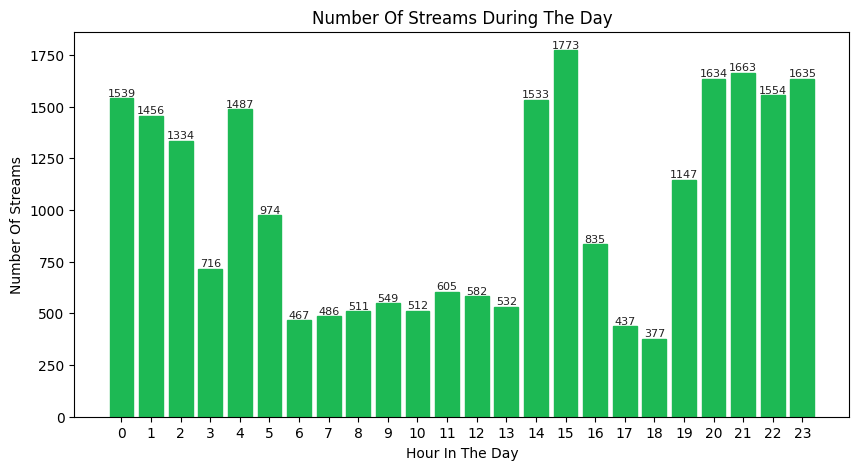

In [15]:
plt.figure(figsize=(10, 5))
plt.bar(HourCount.index, HourCount.values, color="#1db954", edgecolor="#1db954")
for i,j in zip(HourCount.index,HourCount): ##adding values on the bars
    plt.annotate(str(j),xy=(i,j),color="#212121",ha="center", va="bottom", rotation=0, size=8)
plt.title("Number Of Streams During The Day")

plt.xlabel("Hour In The Day")
plt.ylabel("Number Of Streams")
plt.xticks(range(24)) ## showwing all 24 hors in the day
plt.show()

**I listen to music all day long, mostly around 15:00**

---------  
**Top 20 Artists By The Different DayParts**  
Does the time of day determine what artist?

In [16]:
Lp["DayPart"] = Lp["Time"].dt.hour.apply(get_day_part) ## adding daypart column to my df
Lp.head()

,Time,Ms Played,Artist,Album,Song,End,Shuffle,Genre,State,Country,City,Hour,DayOfWeek,Date,MinutesPlayed,DayPart
0,2023-05-27 13:12:34+00:00,196184,Crown The Empire,Sudden Sky,what i am,trckdn,OFF,Metalcore,Texas,United States,Dallas,13,Saturday,2023-05-27,3.27,Afternoon
1,2023-05-27 13:17:26+00:00,291426,Bullet For My Valentine,Fever,Your Betrayal,trckdn,OFF,Metalcore,Wales,United Kingdom,Bridgend,13,Saturday,2023-05-27,4.86,Afternoon
2,2023-05-27 13:21:58+00:00,271000,Five Finger Death Punch,The Wrong Side Of Heaven And The Righteous Sid...,Wrong Side of Heaven,trckdn,OFF,Groove Metal,Nevada,United States,Las Vegas,13,Saturday,2023-05-27,4.52,Afternoon
3,2023-05-27 13:26:41+00:00,259960,Alter Bridge,One Day Remains,Metalingus,trckdn,OFF,Hard Rock,Florida,United States,Orlando,13,Saturday,2023-05-27,4.33,Afternoon
4,2023-05-27 13:31:40+00:00,298600,Alter Bridge,One Day Remains,Open Your Eyes,trckdn,OFF,Hard Rock,Florida,United States,Orlando,13,Saturday,2023-05-27,4.98,Afternoon


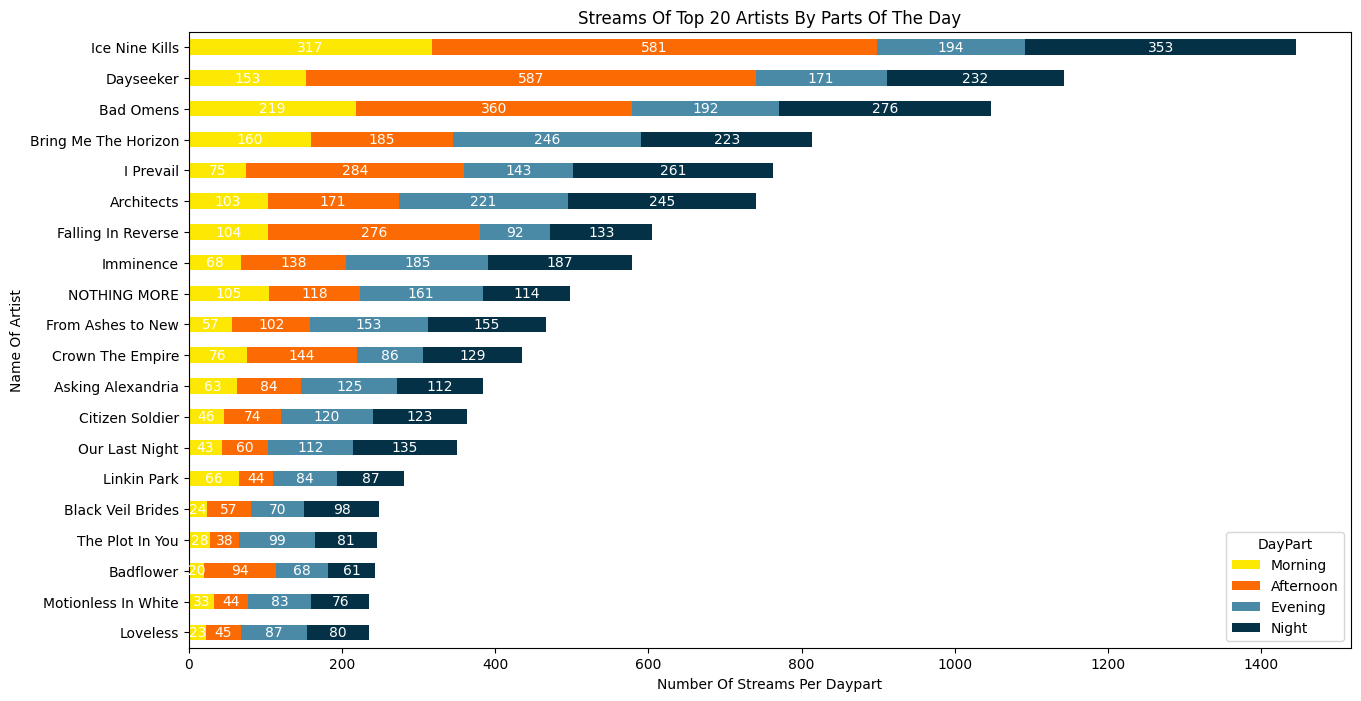

In [17]:
Artists=Lp["Artist"].value_counts().sort_values(ascending=False).head(20) ## most streamd artists
Top20Artists = Artists.index #taking the artists names
Top20Artdf = Lp[Lp["Artist"].isin(Top20Artists)] #making new df with only 20 top artists with mask
ArtistDP = Top20Artdf.pivot_table(index="Artist", columns="DayPart", aggfunc="size", fill_value=0) #making pivot for how many repeats are in dayparts
ArtistDP = ArtistDP.reindex(columns=ordered_dayparts)
ArtistDP = ArtistDP.loc[ArtistDP.sum(axis=1).sort_values(ascending=True).index]

ax=ArtistDP.plot(kind="barh", stacked=True, figsize=(15,8), color=DayPartColors)
for i, artist in enumerate(ArtistDP.index):  
    cumulative_width = 0  # where to put the values
    
    for daypart in ArtistDP.columns:  
        value = ArtistDP.loc[artist, daypart] 
        if value > 0:
            x_pos = cumulative_width + value / 2  
            ax.annotate(str(value), xy=(x_pos, i), ha="center", va="center", color="w", size=10)
        
        cumulative_width += value 
    
plt.title("Number Of Streams During The Day")
plt.title("Streams Of Top 20 Artists By Parts Of The Day")

plt.ylabel("Name Of Artist")
plt.xlabel("Number Of Streams Per Daypart")

plt.show()


**I can see that Ice Nine Kills is the most streamd band in general**  
followed by Dayseeker and Bad omens

------------------------------------  
**HeatMap Of Artists During the Day**  
helps to see who i've listened to most, only top 10

In [18]:
Top10Artists = Lp["Artist"].value_counts().nlargest(10) ###finding top 10 artists
Top10Artists

Artist
Ice Nine Kills          1445
Dayseeker               1143
Bad Omens               1047
Bring Me The Horizon     814
I Prevail                763
Architects               740
Falling In Reverse       605
Imminence                578
NOTHING MORE             498
From Ashes to New        467
Name: count, dtype: int64

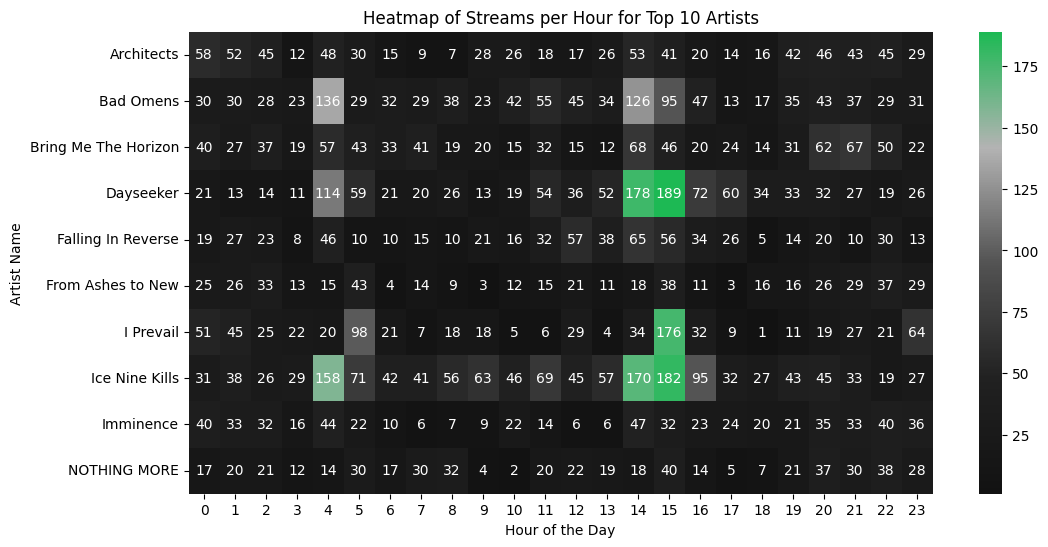

In [19]:
Top10Artists = Lp["Artist"].value_counts().nlargest(10).index ###finding top 10 artists index for pivot
filteredLp = Lp[Lp["Artist"].isin(Top10Artists)] ### df only showing filterd resulrs
ArtistStreamPerHour = filteredLp.groupby(["Hour", "Artist"]).size().reset_index(name="Count") ### counting how many time each artist in each hour

PivotTableA = ArtistStreamPerHour.pivot(index="Artist", columns="Hour", values="Count").fillna(0) ### creating pivot table

custom_cmap = mcolors.LinearSegmentedColormap.from_list("custom_cmap", SpotifyColors, N=256) ### creating color map, spectrum of 256 colors


plt.figure(figsize=(12, 6)) 

sb.heatmap(PivotTableA, cmap=custom_cmap, linewidths=0, annot=True, fmt=".0f") ## map, with values and round numbers
plt.title("Heatmap of Streams per Hour for Top 10 Artists")
plt.xlabel("Hour of the Day")
plt.ylabel("Artist Name")
plt.show()


**I listen to My favorite artist mostly between the hours 14:00-16:00  
I can see that throghout the day i listen to Ice Nine Kills the most**

----------------------  
**How Many Streams For Each DayPart**  
To understand how my listening habits change, I analyzed amount of streams for each part of the day.  
The following chart shows the listening time across Morning, Afternoon, Evening, and Night.


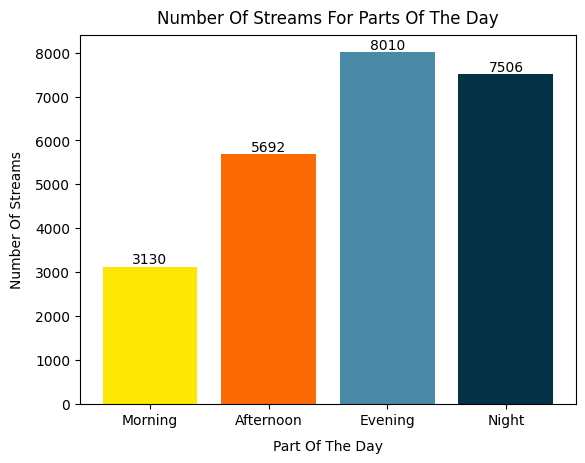

In [20]:
DaypartCounts = Lp["DayPart"].value_counts().reindex(ordered_dayparts) ## count of streams per daypart

plt.bar(DaypartCounts.index, DaypartCounts.values, color=DayPartColors)
for i,j in zip(DaypartCounts.index,DaypartCounts): ## Loop to annotate the data on the bars
    plt.annotate(str(j),xy=(i,j),color="black",ha="center", va="bottom", rotation=0, size=10)

plt.title("Number Of Streams For Parts Of The Day",pad= 8)
plt.xlabel("Part Of The Day", labelpad=8)
plt.ylabel("Number Of Streams", labelpad=8)

plt.show()

**I listen to music mostly in the evening**

--------  
**Finding Out Top 10 Genres**   
This graph visualizes my most played genres on Spotify.  
The goal is to see which genres dominate my listening experience.


In [21]:
Genre=Lp["Genre"].value_counts().sort_values(ascending=False).head(10)
Genre

Genre
Metalcore            9882
Hard Rock            2262
Post-Hardcore        1828
Pop Punk             1579
Alternative Metal    1510
Alternative Rock     1222
Post-Grunge          1121
Rock                  970
Nu Metal              833
Pop Rock              688
Name: count, dtype: int64

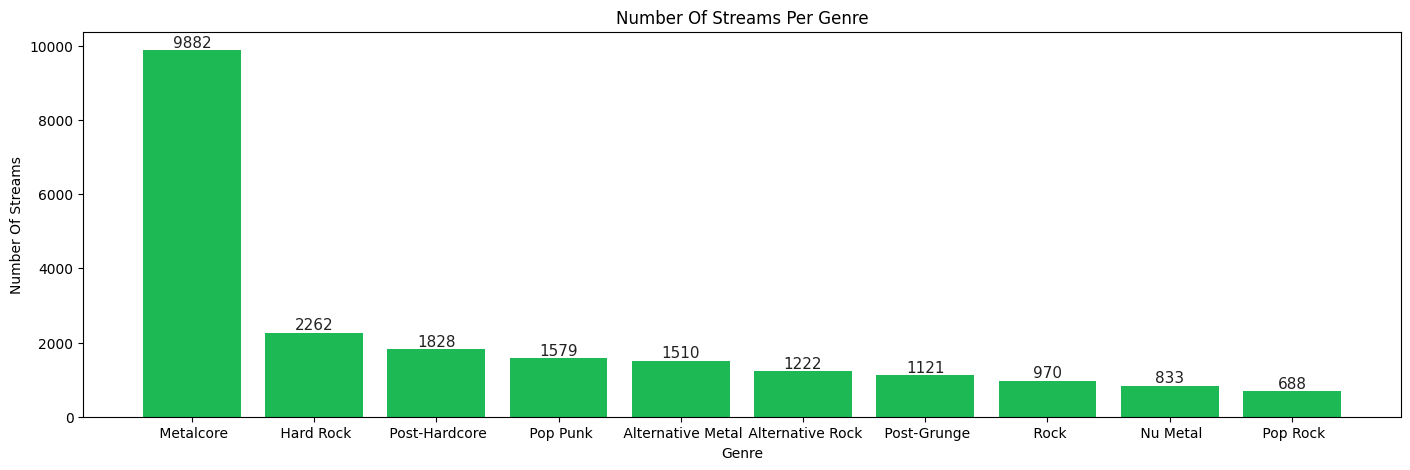

In [22]:
plt.figure(figsize=(17, 5))
plt.bar(Genre.index ,Genre.values, color="#1db954")
for i,j in zip(Genre.index,Genre):
    plt.annotate(str(j),xy=(i,j),color="#212121",ha="center", va="bottom", rotation=0, size=11)

plt.title("Number Of Streams Per Genre")
plt.xlabel("Genre")
plt.ylabel("Number Of Streams")
plt.show()

- My most played genre is **Metalcore**, followed by **Alternative Metal**.
- I listen to more intense music at night, while mornings have softer alternative rock.

---------  
Percentage Of Top 10 Genres

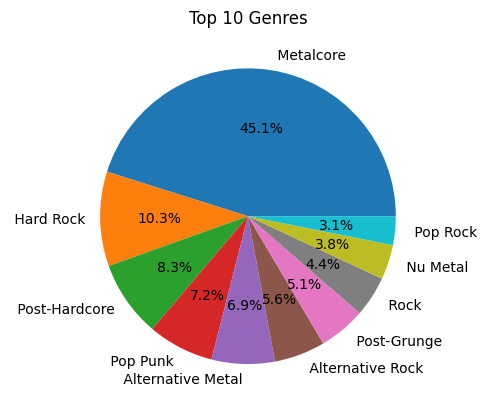

In [23]:
plt.pie(Genre,labels=Genre.index, autopct='%1.1f%%')
plt.title("Top 10 Genres")
plt.show()

**Metalcore is 45.1% of my Genres,  
Hard rock following in the second place with 10.3%.  
Metalcore is almost half of my music**

---------  
Genres Per Part Of Day

In [24]:
# top 5 genres
Top5GenreSE=Lp["Genre"].value_counts().sort_values(ascending=False).head(5)
Top5GenreSE

Genre
Metalcore            9882
Hard Rock            2262
Post-Hardcore        1828
Pop Punk             1579
Alternative Metal    1510
Name: count, dtype: int64

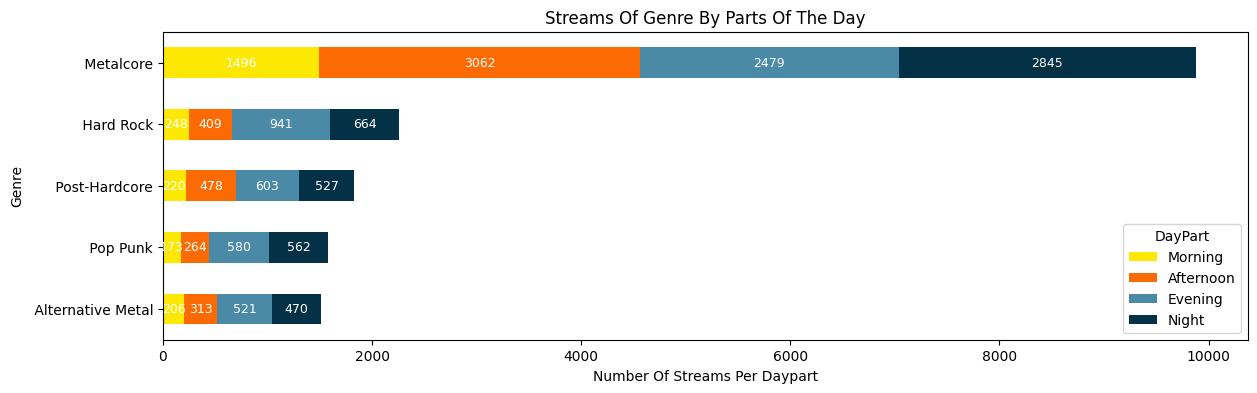

In [25]:
top5genre = Top5GenreSE.index #taking the artists names
top5genre = Lp[Lp["Genre"].isin(top5genre)] #making new df with only 5 top artists
genreDP = top5genre.pivot_table(index="Genre", columns="DayPart", aggfunc="size", fill_value=0) #making pivot for how many repeats are in dayparts
genreDP = genreDP.reindex(columns=ordered_dayparts)
genreDP = genreDP.loc[genreDP.sum(axis=1).sort_values(ascending=True).index]

axE=genreDP.plot(kind="barh", stacked=True, figsize=(14,4), color=DayPartColors)

for i, genre in enumerate(genreDP.index):  
    cumulative_width = 0  # where to put the values
    
    for daypart in genreDP.columns:  
        value = genreDP.loc[genre, daypart] 
        if value > 0:
            x_pos = cumulative_width + value / 2  
            axE.annotate(str(value), xy=(x_pos, i), ha="center", va="center", color="w", size=9)
        
        cumulative_width += value 

plt.title("Streams Of Genre By Parts Of The Day")
plt.ylabel("Genre")
plt.xlabel("Number Of Streams Per Daypart")


plt.show()


**Metalcore is streamed mostly in the afternoon  
Hard Rock mostly in Evenings**  


----------  
**Ending Resons**  
What time of the day i am least patience and skipped songs?  
What is the main reason for songs ending?

In [26]:
End=Lp["End"].value_counts().sort_values(ascending=False)
End

End
trckdn     22917
lgot         725
fwdbtn       521
endplay      134
unee          22
bkbtn         12
uewp           4
remote         2
unkn           1
Name: count, dtype: int64

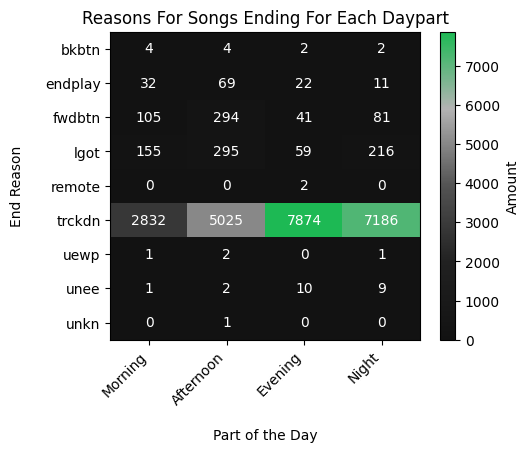

In [27]:
heatmap_data_End = Lp.pivot_table(index="End", columns="DayPart", aggfunc="size", fill_value=0) ##count of end resons for each daypart
heatmap_data_End = heatmap_data_End.reindex(columns=ordered_dayparts) ## ordering by the orderd dayparts

fig, ax = plt.subplots(figsize=(5, 4))
im = ax.imshow(heatmap_data_End, cmap=custom_cmap, aspect="auto") 

for i in range(len(heatmap_data_End.index)):  ## adding values 
    for j in range(len(heatmap_data_End.columns)):
        value = heatmap_data_End.iloc[i, j]
        ax.text(j, i, value, ha="center", va="center", color="white")

ax.set_xticks(range(len(heatmap_data_End.columns))) ## x is the amount of dayparts
ax.set_xticklabels(heatmap_data_End.columns, rotation=45, ha="right")  ## y is the amount of end reasons
ax.set_yticks(range(len(heatmap_data_End.index)))
ax.set_yticklabels(heatmap_data_End.index)

ax.set_title("Reasons For Songs Ending For Each Daypart")
ax.set_xlabel("Part of the Day", labelpad=15)
ax.set_ylabel("End Reason", labelpad=15)

fig.colorbar(im, ax=ax, label="Amount")

plt.show()


**I forwarded more songs in the afternoon, I was least patient.   
The most common reason for the song ending is the song was over, so I listen to songs momstly to the end of them**


---------------  
**Genres In Each Day Part**

In [28]:
#masks for dayparts
mormask=Lp["DayPart"] == "Morning"
aftmask=Lp["DayPart"] == "Afternoon"
evemask=Lp["DayPart"] == "Evening"
nigmask=Lp["DayPart"] == "Night"

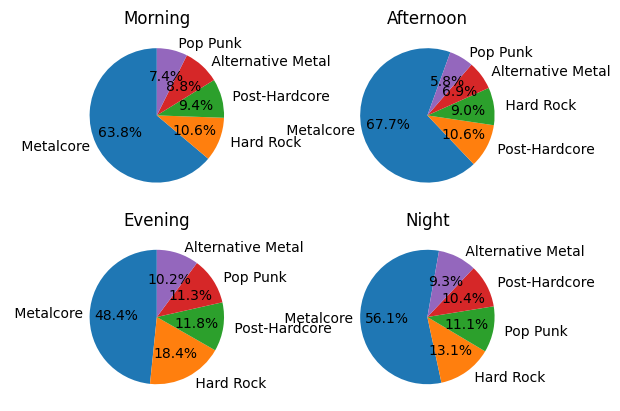

In [29]:
plt.subplot(2,2,1)  # Morning
genre_morning_data = Lp[mormask]["Genre"].value_counts().head(5)  ## showhing only genres played in the Morning
plt.pie(genre_morning_data, labels=genre_morning_data.index, autopct='%1.1f%%', startangle=90)
plt.title("Morning")

plt.subplot(2,2,2)  # Afternoon
genre_afternoon_data = Lp[aftmask]["Genre"].value_counts().head(5)  ## showhing only genres played in the Afternoon
plt.pie(genre_afternoon_data, labels=genre_afternoon_data.index, autopct='%1.1f%%', startangle=70)
plt.title("Afternoon")

plt.subplot(2,2,3)  # Evening
genre_evening_data = Lp[evemask]["Genre"].value_counts().head(5)  ## showhing only genres played in the Evening
plt.pie(genre_evening_data, labels=genre_evening_data.index, autopct='%1.1f%%', startangle=90)
plt.title("Evening")

plt.subplot(2,2,4)  #Night
genre_night_data = Lp[nigmask]["Genre"].value_counts().head(5)  ## showhing only genres played in the Night
plt.pie(genre_night_data, labels=genre_night_data.index, autopct='%1.1f%%', startangle=80)
plt.title("Night")

plt.show()

**Metalcore is the main Genre in all day parts  
I listen to Metalcore most in the afternoon   
hard rock is going up in the evening**



-----------  
Countries 

In [30]:
country = Lp.drop_duplicates(subset=["Artist", "Country"]) ## showing countries for each unique artist
country = country["Country"].value_counts().sort_values(ascending=False) ## counting repatitions for each country

country

Country
United States     165
United Kingdom     29
Canada             18
Australia           7
South Africa        1
Sweden              1
Germany             1
Uruguay             1
Poland              1
Netherlands         1
Ireland             1
Name: count, dtype: int64

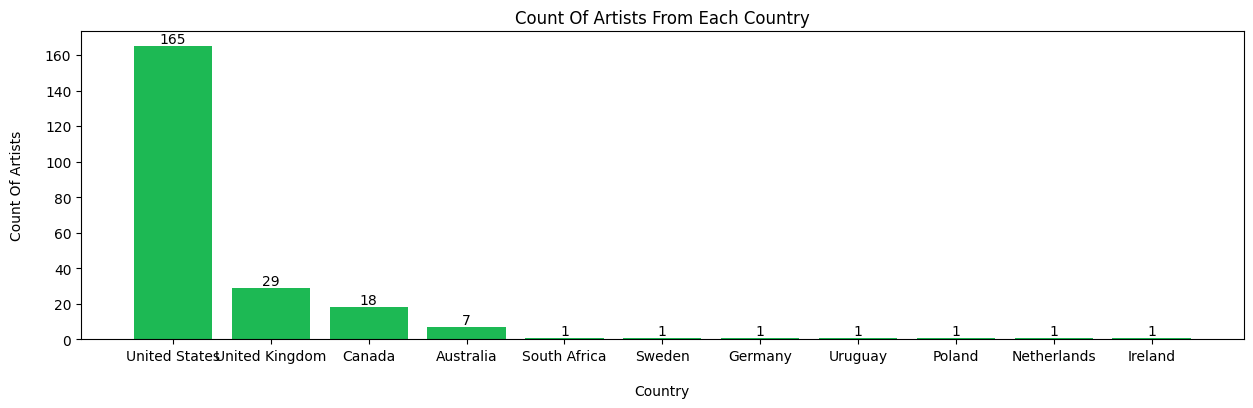

In [31]:
plt.figure(figsize=(15,4))
plt.bar(country.index,country.values,color="#1db954")
for i,j in zip (country.index,country,):
    plt.annotate(str(j),xy=(i,j),color="black",ha="center",va="bottom",rotation=0,size=10)

plt.title("Count Of Artists From Each Country")
plt.xlabel("Country",labelpad=15)
plt.ylabel("Count Of Artists",labelpad=15)
plt.show()



**165 Artists are from the United States,  
This is the main country my music comes from.  
29 Artists from the United Kingdom.**

**Because USA is the most streamed Country, I want to know which city is more frequent**
----

Finding unique combinations of locations (for all of the world)

In [32]:
unique_locart = Lp.drop_duplicates(subset=["Artist", "Country", "State", "City"])
location = unique_locart.groupby(["Country", "State", "City"]).size().sort_values(ascending=False)
location

Country         State       City          
United States   California  Los Angeles       15
                Nevada      Las Vegas          8
United Kingdom  London      London             7
United States   Florida     Orlando            7
Australia       Australia   Sydney             5
                                              ..
United States   Texas       Wichita Falls      1
                Utah        Salt Lake City     1
                            Orem               1
                Virginia    Gore               1
Uruguay         Montevideo  Montevideo         1
Length: 144, dtype: int64

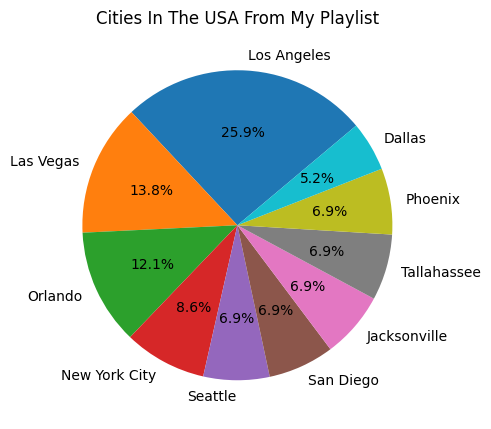

In [33]:
us_locations = unique_locart[unique_locart["Country"] == "United States"]
us_city_counts = us_locations["City"].value_counts().head(10)

plt.figure(figsize=(5,8))
plt.pie(us_city_counts, labels=us_city_counts.index, autopct='%1.1f%%', startangle=40)
plt.title("Cities In The USA From My Playlist")
plt.show()


**Comes to show if i want to explore more i can search for bands from Los Angeles**

-----  
**Top 10 Genres Next To Cities in The USA**

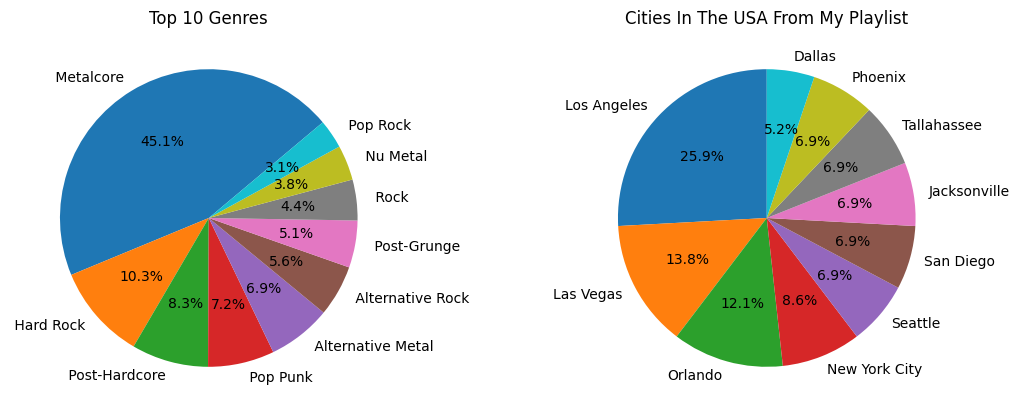

In [34]:
plt.figure(figsize=(12,7))
plt.subplot(1,2,1)  # Genre
genre = Lp["Genre"].value_counts().sort_values(ascending=False).head(10)
plt.pie(genre.values, labels=genre.index, autopct='%1.1f%%', startangle=40)
plt.title("Top 10 Genres")

plt.subplot(1,2,2)  # Cities in USA
plt.pie(us_city_counts, labels=us_city_counts.index, autopct='%1.1f%%', startangle=90,textprops={'fontsize':10})
plt.title("Cities In The USA From My Playlist")
plt.subplots_adjust(wspace=1)  
plt.subplots_adjust(wspace=0.5)
plt.show()


Metalcore & Los Angeles Will Be Best

-----  
**Listening Patterns In Each Day And Each Hour Of The Day**

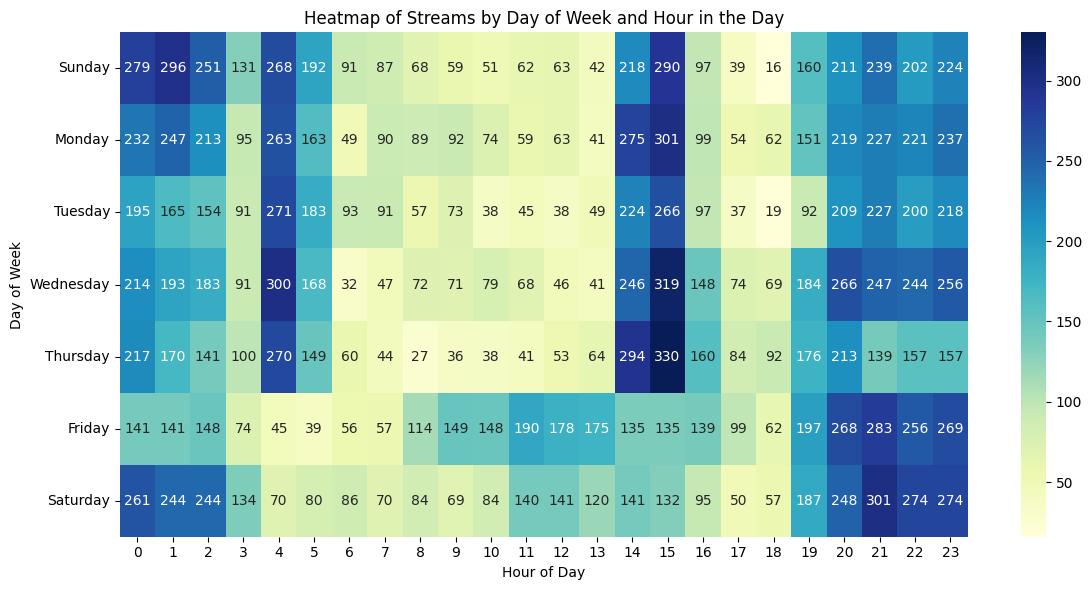

In [35]:
heatmap_data = Lp.pivot_table(index="DayOfWeek", columns="Hour", aggfunc="size", fill_value=0)
days_order = [ "Sunday","Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]
heatmap_data = heatmap_data.reindex(days_order)

plt.figure(figsize=(12, 6))
sb.heatmap(heatmap_data, cmap="YlGnBu", annot=True, fmt="d")
plt.title("Heatmap of Streams by Day of Week and Hour in the Day")
plt.xlabel("Hour of Day")
plt.ylabel("Day of Week")
plt.tight_layout()
plt.show()


**On Sunday-Thursday I have a lot of streams in the hours 14-15  
On Friday & Saturday I Don't listen to music as much, beacuse I'm not at work.  
But you can see on the weekends i listen to more music throughout the day.**

-----  
**Daily Avg streaming for each month**
---

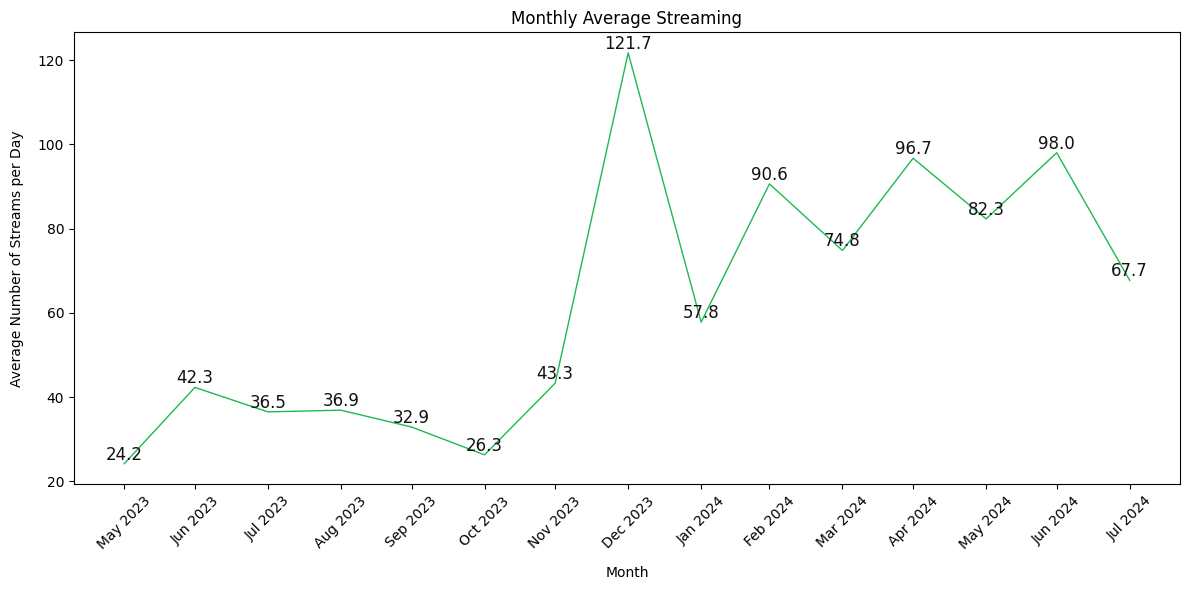

In [36]:
daily_streams = Lp.groupby("Date").size() ## count of streams each day
daily_streams.index = pd.to_datetime(daily_streams.index)  ## converting to datetime

monthly_avg = daily_streams.resample("ME").mean().round(1) ## calculating avarage

plt.figure(figsize=(12, 6))

plt.plot(monthly_avg.index, monthly_avg.values, linewidth=1, linestyle='-',color='#1db954') ##line graph

for i,j in zip(monthly_avg.index,monthly_avg):
    plt.annotate(str(j),xy=(i,j),color="#121212",ha="center", va="bottom", rotation=0, size=12)

plt.title("Monthly Average Streaming")
plt.xlabel("Month",labelpad=10)
plt.ylabel("Average Number of Streams per Day",labelpad=10)
all_months = pd.date_range(start=monthly_avg.index.min(), end=monthly_avg.index.max(), freq="ME") ##writing all the months so they will be seen on X
plt.xticks(all_months, labels=[m.strftime("%b %Y") for m in all_months], rotation=45)

plt.tight_layout()
plt.show()


**From December 2023 I started listening to ,more music**

Final Conclusions & Insights
----

My Listening Patterns:
- My most played genre is **Metalcore**, followed by **Alternative Metal** and **Post-Hardcore**.
- I tend to listen to **heavier music at night**, while my mornings feature **softer alternative music**.
- Los Angeles, USA is the country most of my music comes from
- Ice Nine Kills Is the most streamd Artist
- In December of 2023 my streaming habbits went up
- I skipped more songs in the afternoon & the most common reason for the song ending is the song was over.
How My Listening Habits Change During the Day:
- **Mornings**: More relaxed playlists, lower song skipping.
- **Afternoons**: Higher energy music, more diverse artists.
- **Evenings**: My favorite artists dominate, but I also explore new music.
- **Nights**: Often repeat-play certain songs or albums.

Future Improvements:
- I can **discover new artists** based on my most played genres.
- Adjusting playlists **based on time of day** can improve my experience.
- Further analysis could explore **how song skipping correlates with different genres**.
- -If I am looking for new music, I need to search for artists who play **Metalcore** and are based in **Los Angeles, USA**.  
-I can create a Metalcore playlist for the **Morning**, as this is when I listen to this genre the most."  
-The Playlist will be made with songs of my top 10 artists:  
**1-Ice Nine Kills
2-Dayseeker  
3-Bad Omens  
4-Bring Me The Horizon  
5-I Prevail  
6-Architects  
7-Falling In Reverse  
8-Imminence  
9-NOTHING MORE  
10-From Ashes to New**
